In [1]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import missingno as msno
import sweetviz as sv
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df = df.drop(columns=['url', 'timedelta'])
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# EDA 1

## See the spread of the data

In [3]:
# report = sv.analyze(df)
# report.show_notebook()

## Check for missing values

In [4]:
# msno.bar(df)

Seems like there are no missing values!!

## Look at target variable `shares`

### No transformations

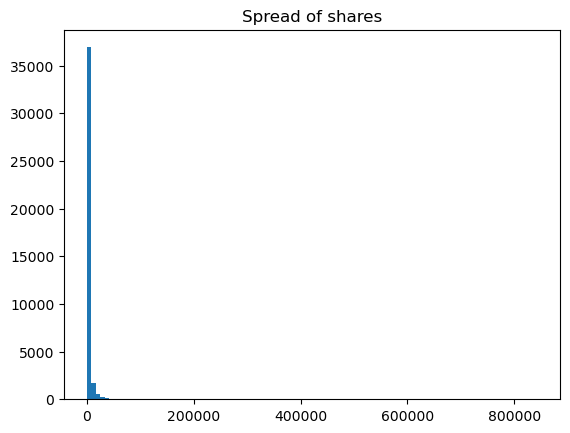

In [5]:
plt.hist(df['shares'], 100)
plt.title('Spread of shares')
plt.show()

## Standardize data

## Remove outliers greater than 3 standard deviations from the mean

In [6]:
standard = StandardScaler(with_std=True)

std_df = df.copy()

std_df['shares'] = standard.fit_transform(df[['shares']])

# Correct usage of .where
std_df['shares'] = std_df['shares'].where(std_df['shares'] <= 3, np.nan)
# Drop rows with NaN (optional)
std_df.dropna(subset=['shares'], inplace=True)

In [7]:
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [8]:
y = std_df[['shares']].to_numpy()

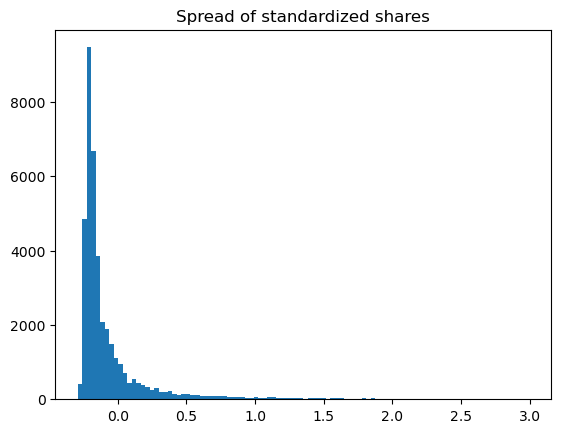

In [9]:
plt.hist(y, 100)
plt.title('Spread of standardized shares')
plt.show()

In [10]:
y = df['shares'].to_numpy()

## Normalize data

In [11]:
mean = y.mean()
y_normal = (y-mean) / mean

In [12]:
y_normal.sort()

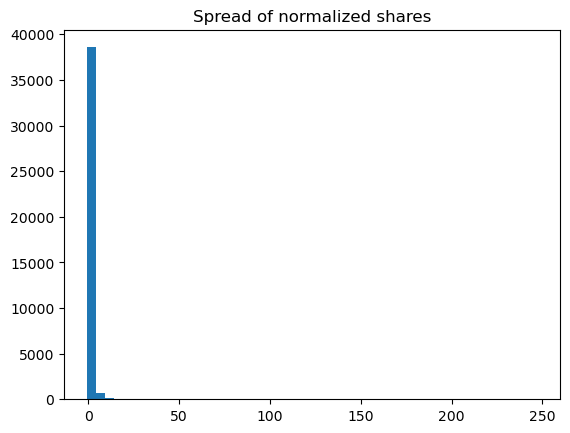

In [13]:
plt.hist(y_normal, 50)
plt.title('Spread of normalized shares')
plt.show()

## Log transform data

In [14]:
log_df = df.copy()

log_df['shares'] = np.log10(df['shares'])

In [15]:
log_df['shares'].describe()

count    39644.000000
mean         3.246288
std          0.404105
min          0.000000
25%          2.975891
50%          3.146128
75%          3.447158
max          5.925982
Name: shares, dtype: float64

In [16]:
y = log_df['shares']

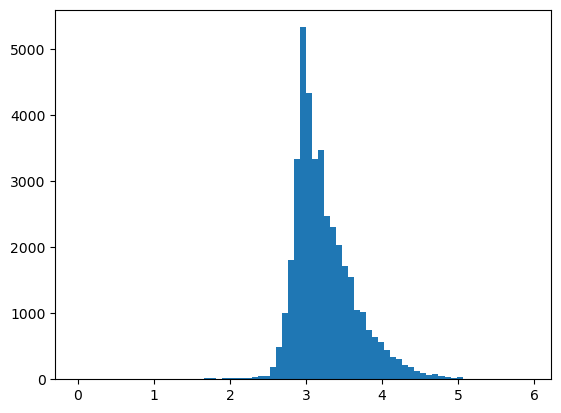

In [17]:
plt.hist(y, 75)
plt.show()

***Log base 10 transformations are the best transformation because of the close spread of the transformed data and most of the data are centered around 3 with a range of [0,6)***

# EDA 2

In [18]:
df['shares'] = log_df['shares']
train_df, test_df = train_test_split(df, random_state=0)

In [19]:
y_train = train_df['shares']
X_train = train_df.drop(columns='shares')
y_test= test_df['shares']
X_test = test_df.drop(columns='shares')

In [20]:
# Use sklearn to get fast estimates and ols model to trim features and draw conclusions
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# No need to transform pred because the model learned to predict log values
pred = model.predict(X_test)
r2 = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)
print(f'{r2=:.4f} {mse=:.4f}')

r2=-0.4370 mse=0.2293


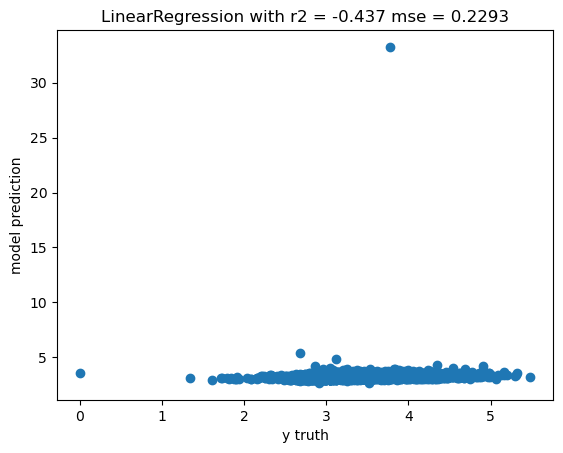

In [22]:
plt.scatter(y_test, pred)
plt.title(f'LinearRegression with r2 = {r2:.3f} mse = {mse:.4f}')
plt.xlabel('y truth')
plt.ylabel('model prediction')
plt.show()

In [23]:
sorted_values = list(zip(y_test, pred))
key = lambda a:a[1]
sorted_values = sorted(sorted_values, key=key)
values = sorted_values[:-1]

In [24]:
clipped_y_test = [y for y,_ in values]
pred = [p for _,p in values]

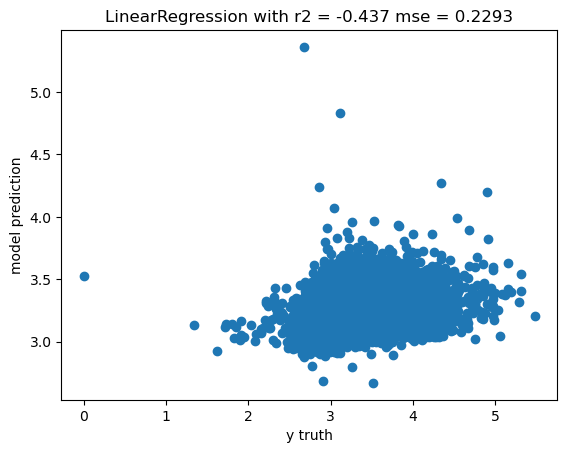

In [25]:
plt.scatter(clipped_y_test, pred)
plt.title(f'LinearRegression with r2 = {r2:.3f} mse = {mse:.4f}')
plt.xlabel('y truth')
plt.ylabel('model prediction')
plt.show()

In [26]:
feats = model.feature_names_in_
coef = model.coef_
info = list(zip(feats, coef))

In [27]:
key = lambda a: abs(a[1])
info = sorted(info, key=key)
info[-10:]

[('data_channel_is_entertainment', -0.07280827880566798),
 ('data_channel_is_bus', -0.07310850094235521),
 ('rate_positive_words', 0.07481391019371184),
 ('avg_negative_polarity', -0.09149585143036798),
 ('min_positive_polarity', -0.09474994134553791),
 ('n_non_stop_unique_tokens', -0.10566607687410431),
 ('LDA_00', 0.12084593656390522),
 ('global_subjectivity', 0.17208919074470308),
 ('global_rate_negative_words', 0.2772736145316002),
 ('global_rate_positive_words', -0.49928003341746724)]

# EDA 3

In [28]:
def find_reg_tree(train_df, test_df, max_depth):
    y_train = train_df['shares']
    X_train = train_df.drop(columns='shares')

    y_test = test_df['shares']
    X_test = test_df.drop(columns='shares')

    info = []

    for i in range(2, max_depth):
        print()
        # max_features=1.0 gives the best r2 and MSE values
        # min_samples_leaf=1 is the best
        # min_samples_split=2 is the best
        model = DecisionTreeRegressor(max_depth=i, splitter='random', max_features=1.0, random_state=0)
        model.fit(X_train, y_train)

        # Check for overfitting
        pred = model.predict(X_train)
        r2 = r2_score(y_train, pred)
        mse = mean_squared_error(y_train, pred)
        print(f'{i}: train_{r2=:.4f} train_{mse=:.4f}')

        # Check for generalization
        pred = model.predict(X_test)
        r2 = r2_score(y_test, pred)
        mse = mean_squared_error(y_test, pred)
        print(f'{i}: test_{r2=:.4f} test_{mse=:.4f}')

        feat_imp = model.feature_importances_
        feat = model.feature_names_in_
        features = list(zip(feat, feat_imp))
        info.append((i,r2,mse,features))

    return info

In [29]:
info = find_reg_tree(train_df, test_df, 50)


2: train_r2=0.0425 train_mse=0.1575
2: test_r2=0.0350 test_mse=0.1540

3: train_r2=0.0669 train_mse=0.1535
3: test_r2=0.0620 test_mse=0.1497

4: train_r2=0.0875 train_mse=0.1501
4: test_r2=0.0646 test_mse=0.1492

5: train_r2=0.0981 train_mse=0.1484
5: test_r2=0.0753 test_mse=0.1475

6: train_r2=0.1133 train_mse=0.1459
6: test_r2=0.0860 test_mse=0.1458

7: train_r2=0.1234 train_mse=0.1442
7: test_r2=0.0796 test_mse=0.1469

8: train_r2=0.1490 train_mse=0.1400
8: test_r2=0.0518 test_mse=0.1513

9: train_r2=0.1830 train_mse=0.1344
9: test_r2=0.0570 test_mse=0.1505

10: train_r2=0.2118 train_mse=0.1297
10: test_r2=0.0314 test_mse=0.1546

11: train_r2=0.2559 train_mse=0.1224
11: test_r2=-0.0136 test_mse=0.1617

12: train_r2=0.2940 train_mse=0.1162
12: test_r2=-0.0239 test_mse=0.1634

13: train_r2=0.3218 train_mse=0.1116
13: test_r2=-0.0792 test_mse=0.1722

14: train_r2=0.4028 train_mse=0.0983
14: test_r2=-0.1655 test_mse=0.1860

15: train_r2=0.4491 train_mse=0.0906
15: test_r2=-0.2325 test_

In [30]:
high_r2 = lambda a : abs(a[1])
high_mse = lambda a : a[2]

r2_info = sorted(info,key=high_r2)
mse_info = sorted(info,key=high_mse)

In [31]:
r2_info[-5:]

[(33,
  -0.8182960677481859,
  0.2901263695950398,
  [('n_tokens_title', 0.02551334238632843),
   ('n_tokens_content', 0.022417961200038097),
   ('n_unique_tokens', 0.01881986288988774),
   ('n_non_stop_words', 0.0008610897497799735),
   ('n_non_stop_unique_tokens', 0.018989329919685563),
   ('num_hrefs', 0.025376209985321117),
   ('num_self_hrefs', 0.016253921307020507),
   ('num_imgs', 0.021724857205265364),
   ('num_videos', 0.020537785804506974),
   ('average_token_length', 0.021720168553356924),
   ('num_keywords', 0.02275830156654381),
   ('data_channel_is_lifestyle', 0.00466315897526559),
   ('data_channel_is_entertainment', 0.014943070856398141),
   ('data_channel_is_bus', 0.007612242879121483),
   ('data_channel_is_socmed', 0.003885908485291268),
   ('data_channel_is_tech', 0.004819661019480681),
   ('data_channel_is_world', 0.025162442277814088),
   ('kw_min_min', 0.01457355770153584),
   ('kw_max_min', 0.018406196817588146),
   ('kw_avg_min', 0.020547932243119963),
   ('kw_m

In [32]:
# mse_info[:10]

## Maximize test r2 score

These are the best generalized versions of the model before the tree overfit:

`max_depth`=20: `train_r2`=0.7400 `train_mse`=0.0428 `test_r2`=-0.4916 `test_mse`=0.2380

`max_depth`=21: `train_r2`=0.7835 `train_mse`=0.0356 `test_r2`=-0.5395 `test_mse`=0.2456

This is the best r2 score with overfitting on the train data:

`max_depth`=43: `train_r2`=1.0000 `train_mse`=0.0000 `test_r2`=-0.8446 `test_mse`=0.2943

In [33]:
max_depth, best_r2, mse, features = r2_info[-1]
key = lambda a: abs(a[1])
best_r2_coef = sorted(features, key=key)
best_r2_coef[-10:]

[('num_hrefs', 0.023097576216803348),
 ('self_reference_min_shares', 0.024106019909922474),
 ('kw_max_min', 0.02470796428137457),
 ('data_channel_is_world', 0.024833444798236796),
 ('LDA_01', 0.02485740327460753),
 ('n_tokens_title', 0.02537483142243439),
 ('num_imgs', 0.02647970104412887),
 ('self_reference_avg_sharess', 0.027068057425992914),
 ('kw_max_avg', 0.03974990930186415),
 ('kw_avg_avg', 0.04536779466068082)]

In [34]:
model = DecisionTreeRegressor(max_depth=max_depth, splitter='random', max_features=1.0, random_state=0)
model.fit(X_train, y_train)

pred = model.predict(X_test)
r2 = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)

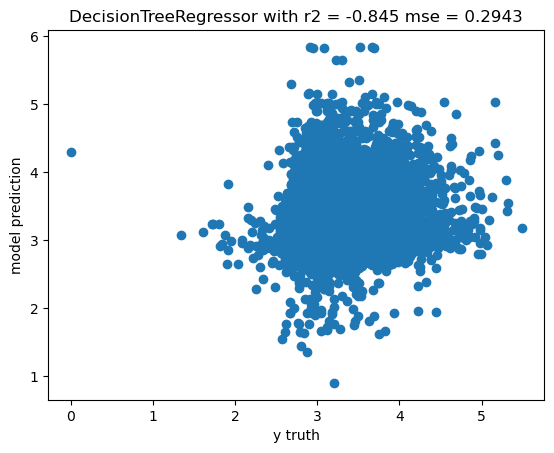

In [35]:
plt.scatter(y_test, pred)
plt.title(f'DecisionTreeRegressor with r2 = {r2:.3f} mse = {mse:.4f}')
plt.xlabel('y truth')
plt.ylabel('model prediction')
plt.show()

# EDA 4